# An Introduction to Convolutional Neural Networks


We’ll build on a basic background knowledge of neural networks and <b>explore what CNNs are, understand how they work, and build a real one from scratch</b> (using only numpy) in Python.

##1. Motivation

A classic use case of CNNs is to perform image classification, e.g. looking at an image of a pet and deciding whether it’s a cat or a dog. It’s a seemingly simple task - <b>why not just use a normal Neural Network?</b>

### Reason 1: Images are Big

Images used for Computer Vision problems nowadays are often 224x224 or larger. Imagine building a neural network to process 224x224 color images: including the 3 color channels (RGB) in the image, that comes out to 224 x 224 x 3 = <b>150,528</b> input features! A typical hidden layer in such a network might have 1024 nodes, so we’d have to train 150,528 x 1024 = <b>150+ million weights for the first layer alone</b>. Our network would be huge and nearly impossible to train.

</br>

It’s not like we need that many weights, either. The nice thing about images is that we know <b>pixels are most useful in the context of their neighbors</b>. Objects in images are made up of small, localized features, like the circular iris of an eye or the square corner of a piece of paper. Doesn’t it seem wasteful for every node in the first hidden layer to look at every pixel?

### Reason 2: Positions can change

If you trained a network to detect dogs, you’d want it to be able to a detect a dog regardless of where it appears in the image. Imagine training a network that works well on a certain dog image, but then feeding it a slightly shifted version of the same image. The dog would not activate the same neurons, so <b>the network would react completely differently!</b>

</br>

We’ll see soon how a CNN can help us mitigate these problems.

## 2. Dataset

In this notebook, we’ll tackle the “Hello, World!” of Computer Vision: the <b>MNIST</b> handwritten digit classification problem. It’s simple: given an image, classify it as a digit.

</br>

![Sample_MNIST_dataset](https://github.com/korobool/hlll_course/blob/master/topics/img/Sample_MNIST_dataset.png?raw=1)

</br>

Each image in the MNIST dataset is 28x28 and contains a centered, grayscale digit.

</br>

Truth be told, a normal neural network would actually work just fine for this problem. You could treat each image as a 28 x 28 = 784-dimensional vector, feed that to a 784-dim input layer, stack a few hidden layers, and finish with an output layer of 10 nodes, 1 for each digit.

</br>

This would only work because the MNIST dataset contains <b>small</b> images that are <b>centered</b>, so we wouldn’t run into the aforementioned issues of size or shifting. Keep in mind throughout the course of this post, however, that <b>most real-world image classification problems aren’t this easy.</b>



## 3. Convolutions

What are Convolutional Neural Networks?

</br>

They’re basically just neural networks that use <b>Convolutional layers</b>, a.k.a. Conv layers, which are based on the mathematical operation of <b>convolution</b>. Conv layers consist of a set of <b>filters</b>, which you can think of as just 2d matrices of numbers. Here’s an example 3x3 filter:

</br>

![A_3x3_filter](https://github.com/korobool/hlll_course/blob/master/topics/img/A_3x3_filter.png?raw=1)

</br>

We can use an input image and a filter to produce an output image by <b>convolving</b> the filter with the input image. This consists of


1.   Overlaying the filter on top of the image at some location.
2.   Performing <b>element-wise multiplication</b> between the values in the filter and their corresponding values in the image.
3.   Summing up all the element-wise products. This sum is the output value for the <b>destination pixel</b> in the output image.
4.   Repeating for all locations.

<i>Side Note: We (along with many CNN implementations) are technically actually using cross-correlation instead of convolution here, but they do almost the same thing. I won’t go into the difference in this post because it’s not that important, but feel free to look this up if you’re curious.</i>

</br>

That 4-step description was a little abstract, so let’s do an example. Consider this tiny 4x4 grayscale image and this 3x3 filter:

</br>

![A4x4image_and_3x3filter](https://github.com/korobool/hlll_course/blob/master/topics/img/A4x4image_and_3x3filter.png?raw=1)

</br>

The numbers in the image represent pixel intensities, where 0 is black and 255 is white. We’ll convolve the input image and the filter to produce a 2x2 output image:

</br>

![A2x2output_image](https://github.com/korobool/hlll_course/blob/master/topics/img/A2x2output_image.png?raw=1)

</br>

To start, lets overlay our filter in the top left corner of the image:

</br>

![Step1](https://github.com/korobool/hlll_course/blob/master/topics/img/Step1.png?raw=1)

</br>

Next, we perform element-wise multiplication between the overlapping image values and filter values. Here are the results, starting from the top left corner and going right, then down:

</br>

![Step2](https://github.com/korobool/hlll_course/blob/master/topics/img/Step2.png?raw=1)

</br>

Next, we sum up all the results. That’s easy enough:

$62 - 33 = 29$
 
Finally, we place our result in the destination pixel of our output image. Since our filter is overlayed in the top left corner of the input image, our destination pixel is the top left pixel of the output image:

</br>

![top_left_overlayed_filter](https://github.com/korobool/hlll_course/blob/master/topics/img/top_left_overlayed_filter.png?raw=1)

</br>

We do the same thing to generate the rest of the output image:

</br>

![overlayed_filter](https://github.com/korobool/hlll_course/blob/master/topics/img/overlayed_filter.png?raw=1)

### 3.1 How is this useful?

Let’s zoom out for a second and see this at a higher level. What does convolving an image with a filter do? We can start by using the example 3x3 filter we’ve been using, which is commonly known as the vertical Sobel filter:

</br>

![VerticalSobelFilter](https://github.com/korobool/hlll_course/blob/master/topics/img/VerticalSobelFilter.png?raw=1)

</br>

Here’s an example of what the vertical Sobel filter does:

</br>

![An_image_convolved_vertical_Sobel_filter](https://github.com/korobool/hlll_course/blob/master/topics/img/An_image_convolved_vertical_Sobel_filter.png?raw=1)

</br>

Similarly, there’s also a horizontal Sobel filter:

</br>

![HorizontalSobelFilter](https://github.com/korobool/hlll_course/blob/master/topics/img/HorizontalSobelFilter.png?raw=1)

</br>

![Image_covered_horizontal_Sobel_filter](https://github.com/korobool/hlll_course/blob/master/topics/img/Image_covered_horizontal_Sobel_filter.png?raw=1)

</br>

See what’s happening? <b>Sobel filters are edge-detectors.</b> The vertical Sobel filter detects vertical edges, and the horizontal Sobel filter detects horizontal edges. The output images are now easily interpreted: a bright pixel (one that has a high value) in the output image indicates that there’s a strong edge around there in the original image.

</br>

Can you see why an edge-detected image might be more useful than the raw image? Think back to our MNIST handwritten digit classification problem for a second. A CNN trained on MNIST might look for the digit 1, for example, by using an edge-detection filter and checking for two prominent vertical edges near the center of the image. In general, <b>convolution helps us look for specific localized image features</b> (like edges) that we can use later in the network.

### 3.2 Padding

Remember convolving a 4x4 input image with a 3x3 filter earlier to produce a 2x2 output image? Often times, we’d prefer to have the output image be the same size as the input image. To do this, we add zeros around the image so we can overlay the filter in more places. A 3x3 filter requires 1 pixel of padding:

</br>

![A4x4input_convolved_3x3filter_with_padding](https://github.com/korobool/hlll_course/blob/master/topics/img/A4x4input_convolved_3x3filter_with_padding.png?raw=1)

</br>

This is called “same” padding, since the input and output have the same dimensions. Not using any padding, which is what we’ve been doing and will continue to do for this post, is sometimes referred to as “valid” padding.

### 3.3 Conv Layers

Now that we know how image convolution works and why it’s useful, let’s see how it’s actually used in CNNs. As mentioned before, CNNs include <b>conv layers</b> that use a set of filters to turn input images into output images. A conv layer’s primary parameter is the <b>number of filters</b> it has.

</br>

For our MNIST CNN, we’ll use a small conv layer with 8 filters as the initial layer in our network. This means it’ll turn the 28x28 input image into a 26x26x8 output <b>volume</b>:

</br>

![conv_dimentions](https://github.com/korobool/hlll_course/blob/master/topics/img/conv_dimentions.png?raw=1)

</br>

<i>Reminder: The output is 26x26x8 and not 28x28x8 because we’re using valid padding, which decreases the input’s width and height by 2.</i>

</br>

Each of the 8 filters in the conv layer produces a 26x26 output, so stacked together they make up a 26x26x8 volume. All of this happens because of 3 \times× 3 (filter size) \times× 8 (number of filters) = <b>only 72 weights!</b>

### 3.4 Implementing Convolution

Time to put what we’ve learned into code! We’ll implement a conv layer’s feedforward portion, which takes care of convolving filters with an input image to produce an output volume. For simplicity, we’ll assume filters are always 3x3 (which is not true - 5x5 and 7x7 filters are also very common).


</br>

Let’s start implementing a conv layer class:

In [0]:
import numpy as np

class Conv3x3:
    # A Convolution layer using 3x3 filters.

    def __init__(self, num_filters):
        self.num_filters = num_filters

        # filters is a 3d array with dimensions (num_filters, 3, 3)
        # We divide by 9 to reduce the variance of our initial values
        self.filters = np.random.randn(num_filters, 3, 3) / 9
        
    def iterate_regions(self, image):
        '''
        Generates all possible 3x3 image regions using valid padding.
        - image is a 2d numpy array
        '''
        h, w = image.shape

        for i in range(h - 2):
            for j in range(w - 2):
                im_region = image[i:(i + 3), j:(j + 3)]
                yield im_region, i, j

    def forward(self, input):
        '''
        Performs a forward pass of the conv layer using the given input.
        Returns a 3d numpy array with dimensions (h, w, num_filters).
        - input is a 2d numpy array
        '''
        h, w = input.shape
        output = np.zeros((h - 2, w - 2, self.num_filters))

        for im_region, i, j in self.iterate_regions(input):
            output[i, j] = np.sum(im_region * self.filters, axis=(1, 2))

        return output

The <b>Conv3x3</b> class takes only one argument: the number of filters. In the constructor, we store the number of filters and initialize a random filters array using NumPy’s <b>randn()</b> method.

</br>

<i>Note: Diving by 9 during the initialization is more important than you may think. If the initial values are too large or too small, training the network will be ineffective. To learn more, read about Xavier Initialization.</i>

</br>

<b>iterate_regions()</b> is a helper generator method that yields all valid 3x3 image regions for us. This will be useful for implementing the backwards portion of this class later on.

</br>

The line of code that actually performs the convolutions is highlighted above. Let’s break it down:

* We have <i>im_region</i>, a 3x3 array containing the relevant image region.
* We have <i>self.filters</i>, a 3d array.
* We do <i>im_region * self.filters</i>, which uses numpy’s <b>broadcasting</b> feature to element-wise multiply the two arrays. The result is a 3d array with the same dimension as <i>self.filters.</i>
* We <i>np.sum()</i> the result of the previous step using <i>axis=(1, 2)</i>, which produces a 1d array of length <i>num_filters</i> where each element contains the convolution result for the corresponding filter.
* We assign the result to $output[i, j]$, which contains convolution results for pixel $(i, j)$ in the output.

</br>

The sequence above is performed for each pixel in the output until we obtain our final output volume! Let’s give our code a test run:

In [2]:
!pip install mnist

In [3]:
import mnist

# The mnist package handles the MNIST dataset for us!
# Learn more at https://github.com/datapythonista/mnist
train_images = mnist.train_images()
train_labels = mnist.train_labels()

conv = Conv3x3(8)
output = conv.forward(train_images[0])
print(output.shape) # (26, 26, 8)

(26, 26, 8)


<i>Note: in our Conv3x3 implementation, we assume the input is a <b>2d</b> numpy array for simplicity, because that’s how our MNIST images are stored. This works for us because we use it as the first layer in our network, but most CNNs have many more Conv layers. If we were building a bigger network that needed to use Conv3x3 multiple times, we’d have to make the input be a <b>3d</b> numpy array.</i>

## 4. Pooling

Neighboring pixels in images tend to have similar values, so conv layers will typically also produce similar values for neighboring pixels in outputs. As a result, <b>much of the information contained in a conv layer’s output is redundant.</b> For example, if we use an edge-detecting filter and find a strong edge at a certain location, chances are that we’ll also find relatively strong edges at locations 1 pixel shifted from the original one. However, <b>these are all the same edge!</b> We’re not finding anything new.

</br>

Pooling layers solve this problem. All they do is reduce the size of the input it’s given by (you guessed it) pooling values together in the input. The pooling is usually done by a simple operation like $max$, $min$, or $average$. Here’s an example of a Max Pooling layer with a pooling size of 2:

</br>

![MaxPooling_4x4image_2x2output](https://github.com/korobool/hlll_course/blob/master/topics/img/MaxPooling_4x4image_2x2output.png?raw=1)

</br>

To perform max pooling, we traverse the input image in 2x2 blocks (because pool size = 2) and put the max value into the output image at the corresponding pixel. That’s it!

</br>

<b>Pooling divides the input’s width and height by the pool size.</b> For our MNIST CNN, we’ll place a Max Pooling layer with a pool size of 2 right after our initial conv layer. The pooling layer will transform a 26x26x8 input into a 13x13x8 output:

</br>

![26x26x8input_to_13x13x8output](https://github.com/korobool/hlll_course/blob/master/topics/img/26x26x8input_to_13x13x8output.png?raw=1)

</br>

### 4.1 Implementing Pooling

We’ll implement a $MaxPool2$ class with the same methods as our conv class from the previous section:

In [0]:
class MaxPool2:
    # A Max Pooling layer using a pool size of 2.

    def iterate_regions(self, image):
        '''
        Generates non-overlapping 2x2 image regions to pool over.
        - image is a 2d numpy array
        '''
        h, w, _ = image.shape
        new_h = h // 2
        new_w = w // 2

        for i in range(new_h):
            for j in range(new_w):
                im_region = image[(i * 2):(i * 2 + 2), (j * 2):(j * 2 + 2)]
                yield im_region, i, j

    def forward(self, input):
        '''
        Performs a forward pass of the maxpool layer using the given input.
        Returns a 3d numpy array with dimensions (h / 2, w / 2, num_filters).
        - input is a 3d numpy array with dimensions (h, w, num_filters)
        '''
        h, w, num_filters = input.shape
        output = np.zeros((h // 2, w // 2, num_filters))

        for im_region, i, j in self.iterate_regions(input):
            output[i, j] = np.amax(im_region, axis=(0, 1))

        return output

This class works similarly to the <i>Conv3x3</i> class we implemented previously. The critical line is again highlighted: to find the max from a given image region, we use np.amax(), numpy’s array max method. We set <i>axis=(0, 1)</i> because we only want to maximize over the first two dimensions, height and width, and not the third, <i>num_filters</i>.

In [5]:
# The mnist package handles the MNIST dataset for us!
# Learn more at https://github.com/datapythonista/mnist
train_images = mnist.train_images()
train_labels = mnist.train_labels()

conv = Conv3x3(8)
pool = MaxPool2()

output = conv.forward(train_images[0])
output = pool.forward(output)
print(output.shape) # (13, 13, 8)

(13, 13, 8)


## 5. Softmax

To complete our CNN, we need to give it the ability to actually make predictions. We’ll do that by using the standard final layer for a multiclass classification problem: the <b>Softmax</b> layer, a fully-connected (dense) layer that uses the <b>Softmax function</b> as its activation.

</br>

<i>Reminder: fully-connected layers have every node connected to every output from the previous layer.
</i>

</br>

If you haven’t heard of Softmax before, read my quick introduction to Softmax before continuing.

### 5.1 Usage

We’ll use a softmax layer with <b>10 nodes, one representing each digit</b>, as the final layer in our CNN. Each node in the layer will be connected to every input. After the softmax transformation is applied, <b>the digit represented by the node with the highest probability</b> will be the output of the CNN!

</br>

![28x28inpup_10softmaxoutput](https://github.com/korobool/hlll_course/blob/master/topics/img/28x28inpup_10softmaxoutput.png?raw=1)

</br>



### 5.2 Cross-Entropy Loss

You might have just thought to yourself, why bother transforming the outputs into probabilities? Won’t the highest output value always have the highest probability? If you did, you’re absolutely right. <b>We don’t actually need to use softmax to predict a digit </b>- we could just pick the digit with the highest output from the network!

</br>

What softmax really does is help us <b>quantify how sure we are of our prediction</b>, which is useful when training and evaluating our CNN. More specifically, using softmax lets us use <b>cross-entropy loss</b>, which takes into account how sure we are of each prediction. Here’s how we calculate cross-entropy loss:

</br>

$L = - \ln(p_{c})$

</br>

where $c$ is the correct class (in our case, the correct digit), $p_{c}$
  is the predicted probability for class $c$, and $ln$ is the natural log. As always, a lower loss is better. For example, in the best case, we’d have
  
  </br>
  
  $p_{c} = 1, L = - \ln(1) = 0$
  
  </br>
  
  In a more realistic case, we might have
  
   </br>
   
   $p_{c} = 0.8, L = - \ln(0.8) = 0.223$
   
  </br>
    
 We’ll be seeing cross-entropy loss again later on in this post, so keep it in mind!

### 5.3 Implementing Softmax

Let’s implement a Softmax layer class:



In [0]:
class Softmax:
    # A standard fully-connected layer with softmax activation.

    def __init__(self, input_len, nodes):
        # We divide by input_len to reduce the variance of our initial values
        self.weights = np.random.randn(input_len, nodes) / input_len
        self.biases = np.zeros(nodes)

    def forward(self, input):
        '''
        Performs a forward pass of the softmax layer using the given input.
        Returns a 1d numpy array containing the respective probability values.
        - input can be any array with any dimensions.
        '''
        input = input.flatten()

        input_len, nodes = self.weights.shape

        totals = np.dot(input, self.weights) + self.biases
        exp = np.exp(totals)
        return exp / np.sum(exp, axis=0)

There’s nothing too complicated here. A few highlights:

</br>

* We flatten() the input to make it easier to work with, since we no longer need its shape.
* np.dot() multiplies $input$ and $self.weights$ element-wise and then sums the results.
* np.exp() calculates the exponentials used for Softmax.


</br>

We’ve now completed the entire forward pass of our CNN! Putting it together:

In [7]:
# We only use the first 1k testing examples (out of 10k total)
# in the interest of time. Feel free to change this if you want.
test_images = mnist.test_images()[:1000]
test_labels = mnist.test_labels()[:1000]

conv = Conv3x3(8)                  # 28x28x1 -> 26x26x8
pool = MaxPool2()                  # 26x26x8 -> 13x13x8
softmax = Softmax(13 * 13 * 8, 10) # 13x13x8 -> 10

def forward(image, label):
    '''
    Completes a forward pass of the CNN and calculates the accuracy and
    cross-entropy loss.
    - image is a 2d numpy array
    - label is a digit
    '''
    # We transform the image from [0, 255] to [-0.5, 0.5] to make it easier
    # to work with. This is standard practice.
    out = conv.forward((image / 255) - 0.5)
    out = pool.forward(out)
    out = softmax.forward(out)

    # Calculate cross-entropy loss and accuracy. np.log() is the natural log.
    loss = -np.log(out[label])
    acc = 1 if np.argmax(out) == label else 0

    return out, loss, acc

print('MNIST CNN initialized!')

loss = 0
num_correct = 0
for i, (im, label) in enumerate(zip(test_images, test_labels)):
    # Do a forward pass.
    _, l, acc = forward(im, label)
    loss += l
    num_correct += acc

    # Print stats every 100 steps.
    if i % 100 == 99:
        print(
          '[Step %d] Past 100 steps: Average Loss %.3f | Accuracy: %d%%' %
          (i + 1, loss / 100, num_correct)
        )
        loss = 0
        num_correct = 0

MNIST CNN initialized!
[Step 100] Past 100 steps: Average Loss 2.302 | Accuracy: 8%
[Step 200] Past 100 steps: Average Loss 2.302 | Accuracy: 11%
[Step 300] Past 100 steps: Average Loss 2.303 | Accuracy: 8%
[Step 400] Past 100 steps: Average Loss 2.303 | Accuracy: 7%
[Step 500] Past 100 steps: Average Loss 2.302 | Accuracy: 9%
[Step 600] Past 100 steps: Average Loss 2.303 | Accuracy: 4%
[Step 700] Past 100 steps: Average Loss 2.302 | Accuracy: 8%
[Step 800] Past 100 steps: Average Loss 2.303 | Accuracy: 10%
[Step 900] Past 100 steps: Average Loss 2.303 | Accuracy: 5%
[Step 1000] Past 100 steps: Average Loss 2.303 | Accuracy: 9%


## 6. Conclusion

That’s the end of this introduction to CNNs! In this post, we

</br>

* Motivated why CNNs might be more useful for certain problems, like image classification.
* Introduced the <b>MNIST</b> handwritten digit dataset.
* Learned about <b>Conv layers</b>, which convolve filters with images to produce more useful outputs.
* Talked about <b>Pooling layers</b>, which can help prune everything but the most useful features.
* Implemented a <b>Softmax</b> layer so we could use <b>cross-entropy loss</b>.

</br>

There’s still much more that we haven’t covered yet, such as how to actually train a CNN. <b>Part 2 of this CNN series does a deep-dive on training a CNN</b>, including deriving gradients and implementing backprop.

</br>

If you’re eager to see a trained CNN in action: [this example Keras CNN](https://keras.io/examples/mnist_cnn/) trained on MNIST achieves <b>99.25%</b> accuracy. CNNs are powerful!

In [0]:
# !pip install keras tensorflow

In [9]:
 from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()


W0810 07:38:48.067671 140470422382464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0810 07:38:48.087890 140470422382464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0810 07:38:48.090363 140470422382464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0810 07:38:48.117075 140470422382464 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0810 07:38:48.121288 140470422382464 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


W0810 07:38:48.314105 140470422382464 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 126us/step - loss: 0.2599 - acc: 0.9198 - val_loss: 0.0627 - val_acc: 0.9792
Epoch 2/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0909 - acc: 0.9735 - val_loss: 0.0421 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.0675 - acc: 0.9797 - val_loss: 0.0379 - val_acc: 0.9866
Epoch 4/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0576 - acc: 0.9834 - val_loss: 0.0325 - val_acc: 0.9887
Epoch 5/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0485 - acc: 0.9853 - val_loss: 0.0331 - val_acc: 0.9888
Epoch 6/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0415 - acc: 0.9876 - val_loss: 0.0294 - val_acc: 0.9899
Epoch 7/12
60000/60000 [==============================] - 5s 76us/step - loss: 0.0392 - acc: 0.9880 - val_loss: 0.0275 - val_ac

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027083164469446003
Test accuracy: 0.9913


In [0]:
import matplotlib
%matplotlib inline

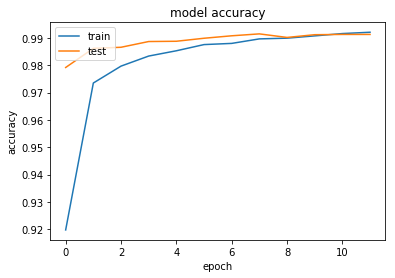

In [17]:
# summarize history for accuracy
matplotlib.pyplot.plot(history.history['acc'])
matplotlib.pyplot.plot(history.history['val_acc'])
matplotlib.pyplot.title('model accuracy')
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend(['train', 'test'], loc='upper left')
matplotlib.pyplot.show()

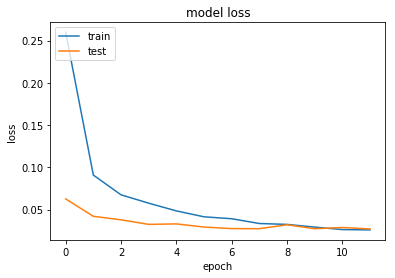

In [19]:
# summarize history for loss
matplotlib.pyplot.plot(history.history['loss'])
matplotlib.pyplot.plot(history.history['val_loss'])
matplotlib.pyplot.title('model loss')
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend(['train', 'test'], loc='upper left')
matplotlib.pyplot.show()